In [77]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json
import os
import seaborn as sns

# Import the sleap_roots package
import sleap_roots as sr

from pathlib import Path

# Use the following notation to import individual functions from the sleap_roots package
from sleap_roots.points import plot_root_associations, associate_lateral_to_primary

In [93]:
# Print sleap_roots version
print(sr.__version__)

0.0.7


In [78]:
# Get the current working directory
current_directory = os.getcwd()

# Print the current working directory
print("Current directory:", current_directory)

Current directory: C:\repos\sleap-roots


In [79]:
# Use this cell if you want to change the current working directory

# Define the directory you want to change to
new_directory = "C:/repos/sleap-roots"

# Change the current working directory
os.chdir(new_directory)

# Get the updated current working directory
updated_directory = os.getcwd()

# Print the updated current working directory
print("Updated current directory:", updated_directory)


Updated current directory: C:\repos\sleap-roots


In [80]:
# Change these variables for your own data
csv_path = "tests/data/multiple_arabidopsis_11do/merged_proofread_samples_03122024.csv" # For sample information (count, group)
folder_path = "tests/data/multiple_arabidopsis_11do" # Location of h5 files and predictions
primary_name = "primary" # For loading primary root predictions
lateral_name = "lateral" # For loading lateral root predictions

In [81]:
# Find all h5 files in the folder
all_h5s = sr.find_all_series(folder_path)
all_h5s

['tests/data/multiple_arabidopsis_11do/6039_1.h5',
 'tests/data/multiple_arabidopsis_11do/7327_2.h5',
 'tests/data/multiple_arabidopsis_11do/9535_1.h5',
 'tests/data/multiple_arabidopsis_11do/997_1.h5']

In [82]:
# Load the cylinder series (one per h5 file)
all_series = [sr.Series.load(h5_path=h5, primary_name=primary_name, lateral_name=lateral_name, csv_path=csv_path) for h5 in all_h5s]
all_series

[Series(h5_path='tests/data/multiple_arabidopsis_11do/6039_1.h5', primary_labels=Labels(labeled_frames=67, videos=1, skeletons=1, tracks=0), lateral_labels=Labels(labeled_frames=68, videos=1, skeletons=1, tracks=0), crown_labels=None, video=Video(filename="tests/data/multiple_arabidopsis_11do/6039_1.h5", shape=(72, 1088, 2048, 1), dataset=vol, backend=HDF5Video), csv_path='tests/data/multiple_arabidopsis_11do/merged_proofread_samples_03122024.csv'),
 Series(h5_path='tests/data/multiple_arabidopsis_11do/7327_2.h5', primary_labels=Labels(labeled_frames=43, videos=1, skeletons=1, tracks=0), lateral_labels=Labels(labeled_frames=31, videos=1, skeletons=1, tracks=0), crown_labels=None, video=Video(filename="tests/data/multiple_arabidopsis_11do/7327_2.h5", shape=(72, 1088, 2048, 1), dataset=vol, backend=HDF5Video), csv_path='tests/data/multiple_arabidopsis_11do/merged_proofread_samples_03122024.csv'),
 Series(h5_path='tests/data/multiple_arabidopsis_11do/9535_1.h5', primary_labels=Labels(labe

Example usage for one sample

In [83]:
# Get the first series in the list
series = all_series[0]
print(f"First sample has name {series.series_name}")
print(f"First sample has genotype {series.group}")

First sample has name 6039_1
First sample has genotype 6039


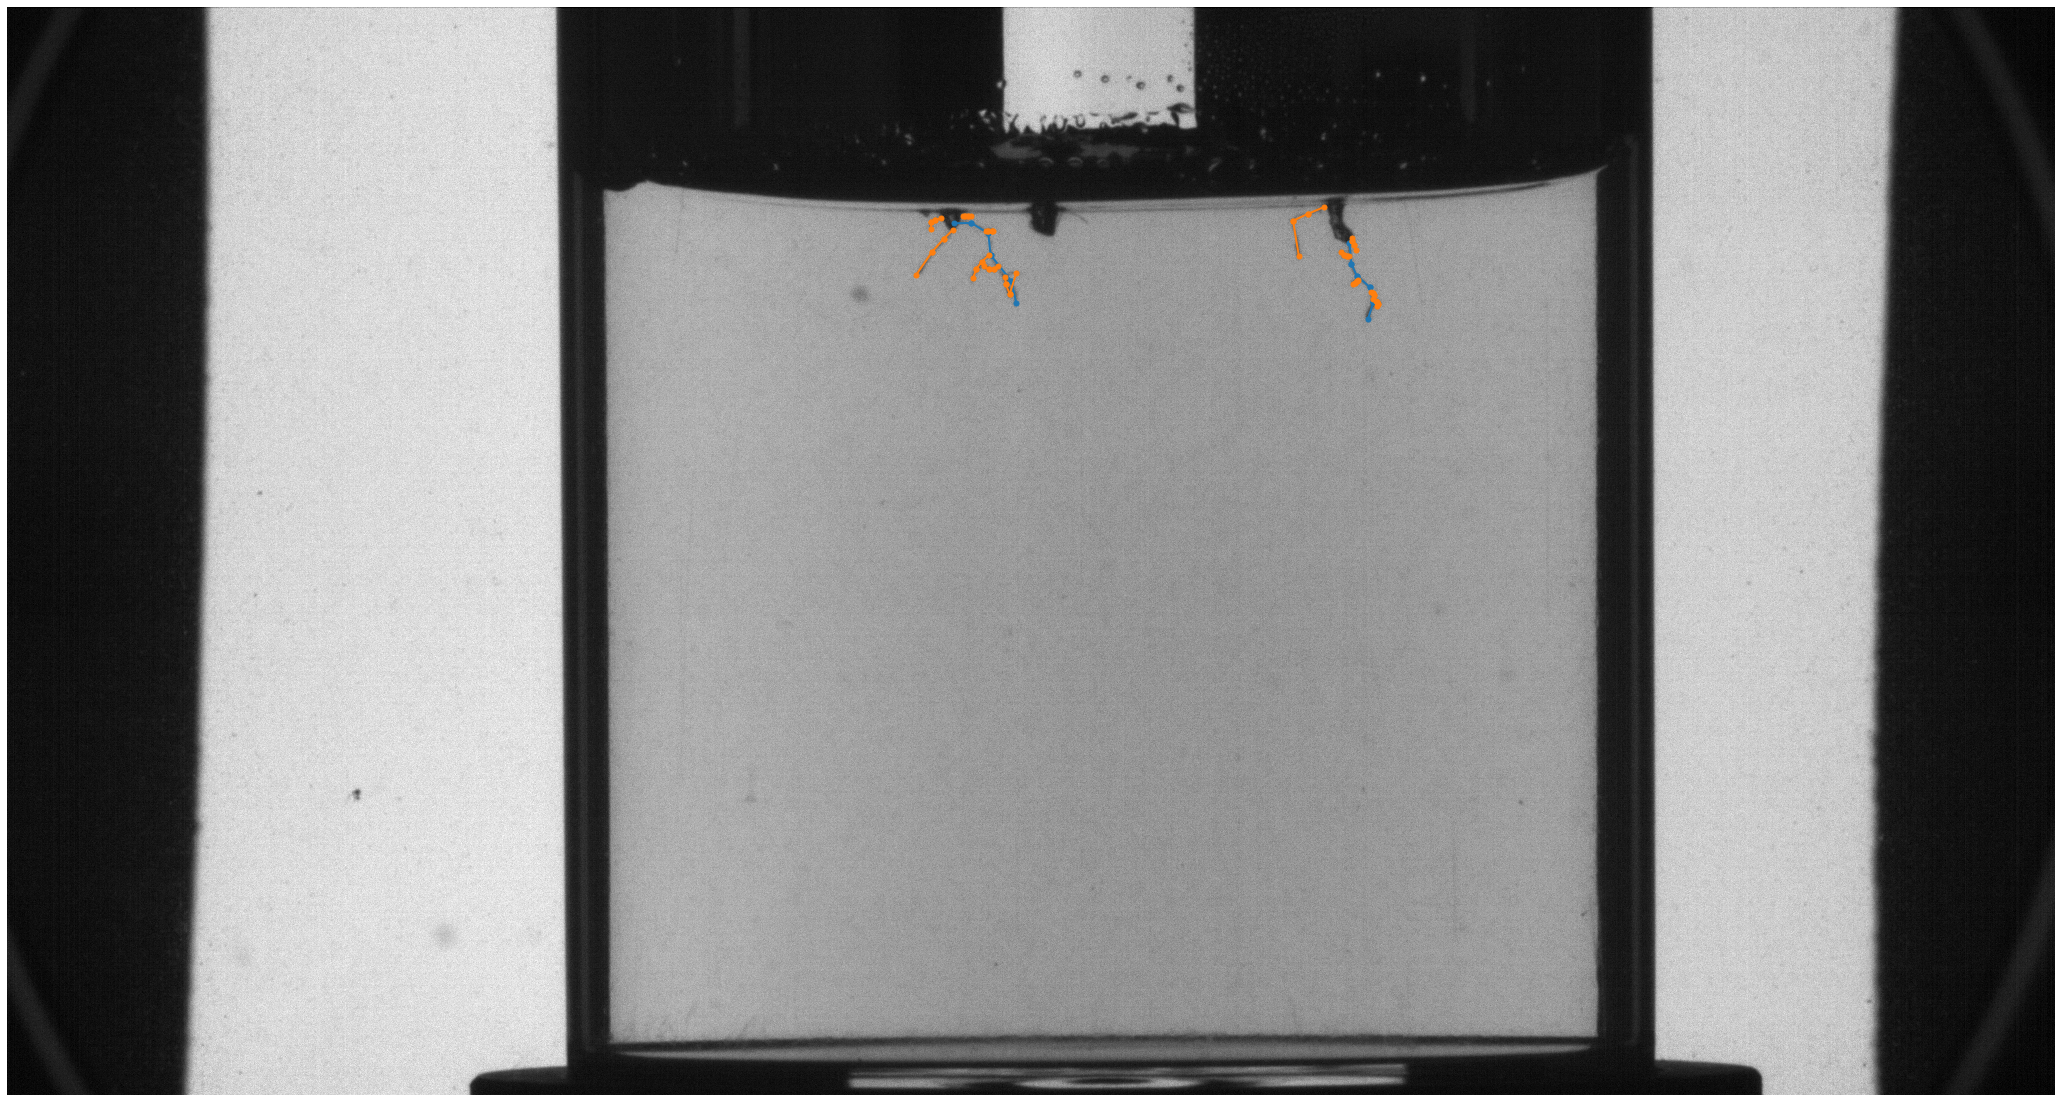

In [84]:
# Plot the first frame of the first series
series.plot(0)

In [85]:
# Get the primary root points for the first frame
primary_pts = series.get_primary_points(0)
print(f"Shape of primary points: {primary_pts.shape}")

# Get the lateral root points for the first frame
lateral_pts = series.get_lateral_points(0)
print(f"Shape of lateral points: {lateral_pts.shape}")

Shape of primary points: (2, 6, 2)
Shape of lateral points: (13, 4, 2)


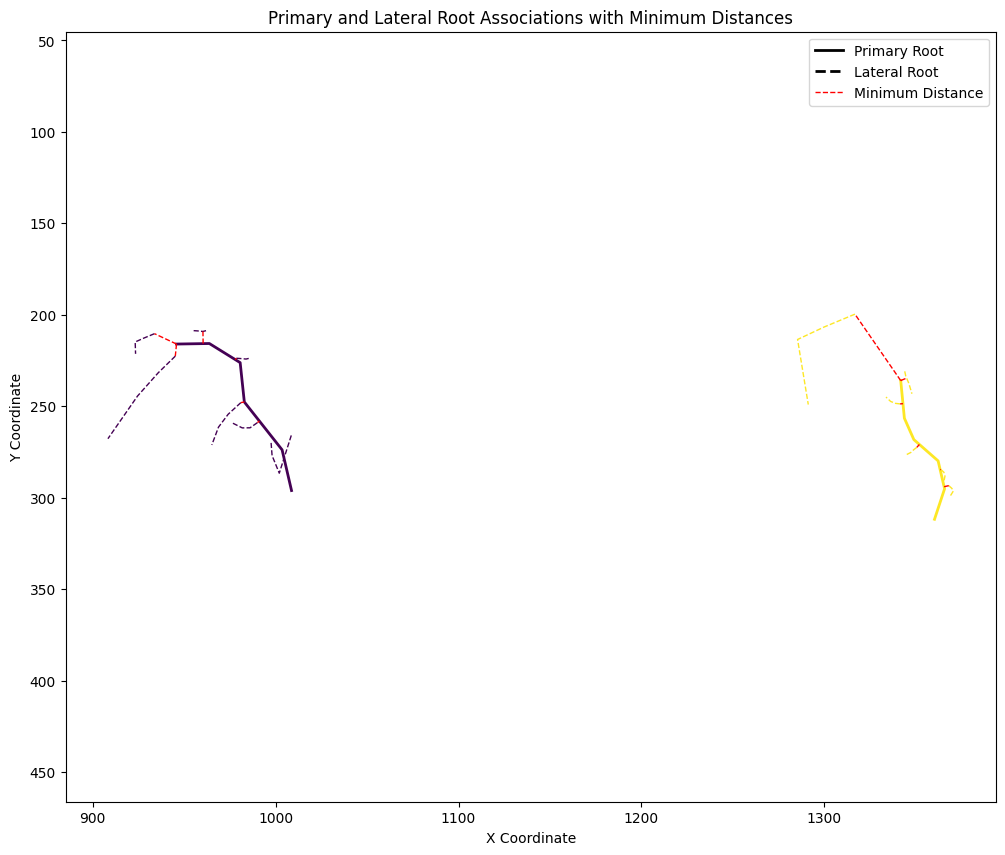

In [86]:
# Associate lateral roots to primary roots
plant_dict = associate_lateral_to_primary(primary_pts, lateral_pts)

# Plot the plants (associated primary and lateral roots)
plot_root_associations(plant_dict)

Use the `MultipleDicotPipeline` for computing all of the traits of all of the samples

In [87]:
# Initialize the pipeline for multiple dicots
pipeline = sr.MultipleDicotPipeline()

In [88]:
# Get the traits of the first sample
first_sample_traits = pipeline.compute_multiple_dicots_traits(series=series, write_json=True, write_csv=True)

Aggregated traits saved to 6039_1.all_frames_traits.json
Summary statistics saved to 6039_1.all_frames_summary.csv


<Axes: ylabel='Count'>

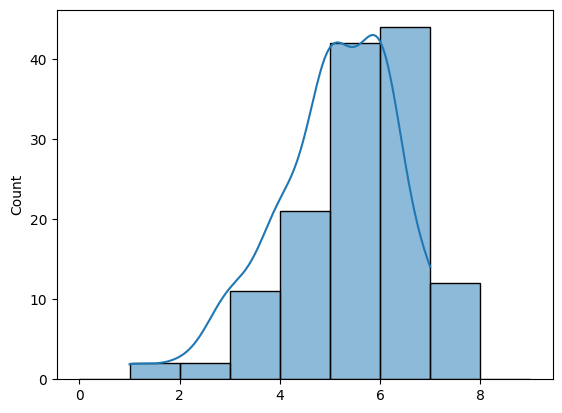

In [89]:
# Make a histogram of the lateral root count for the first sample
lateral_ct = first_sample_traits["traits"]["lateral_count"]
sns.histplot(lateral_ct, bins=range(0, 10), kde=True)

In [90]:
# Get the traits for all samples, grouped by genotype
grouped_traits = pipeline.compute_multiple_dicots_traits_for_groups(series_list=list(all_series), write_json=True, write_csv=True)

Processing series '6039_1'
Finished processing group '6039'
Aggregated traits for group 6039 saved to grouped_traits\6039.grouped_traits.json
Summary statistics for group 6039 saved to grouped_traits\6039.grouped_summary.csv
Processing series '7327_2'
Finished processing group '7327'
Aggregated traits for group 7327 saved to grouped_traits\7327.grouped_traits.json
Summary statistics for group 7327 saved to grouped_traits\7327.grouped_summary.csv
Processing series '9535_1'
Finished processing group '9535'
Aggregated traits for group 9535 saved to grouped_traits\9535.grouped_traits.json
Summary statistics for group 9535 saved to grouped_traits\9535.grouped_summary.csv
Processing series '997_1'
Finished processing group '997'
Aggregated traits for group 997 saved to grouped_traits\997.grouped_traits.json
Summary statistics for group 997 saved to grouped_traits\997.grouped_summary.csv


In [91]:
# Get the summary statistics of the traits for all samples, grouped by genotype
grouped_summary_df = pipeline.compute_batch_multiple_dicots_traits_for_groups(all_series=list(all_series), write_json=True, write_csv=True)

Processing series '6039_1'
Finished processing group '6039'
Aggregated traits for group 6039 saved to grouped_traits\6039.grouped_traits.json
Processing series '7327_2'
Finished processing group '7327'
Aggregated traits for group 7327 saved to grouped_traits\7327.grouped_traits.json
Processing series '9535_1'
Finished processing group '9535'
Aggregated traits for group 9535 saved to grouped_traits\9535.grouped_traits.json
Processing series '997_1'
Finished processing group '997'
Aggregated traits for group 997 saved to grouped_traits\997.grouped_traits.json
Computed traits for all groups saved to group_summarized_traits.csv


In [92]:
# Inspect the summary statistics
grouped_summary_df

,genotype,lateral_count_min,lateral_count_max,lateral_count_mean,lateral_count_median,lateral_count_std,lateral_count_p5,lateral_count_p25,lateral_count_p75,lateral_count_p95,...,network_distribution_ratio_p95,network_solidity_min,network_solidity_max,network_solidity_mean,network_solidity_median,network_solidity_std,network_solidity_p5,network_solidity_p25,network_solidity_p75,network_solidity_p95
0,6039,1,7,5.082090,5.0,1.240176,3.00,4.0,6.00,7.0,...,0.757133,0.041121,0.150504,0.062255,0.057276,0.019820,0.042815,0.048231,0.070095,0.098175
1,7327,1,9,3.434109,1.0,2.825260,1.00,1.0,6.00,8.0,...,0.679840,0.024168,0.293489,0.092920,0.087395,0.062009,0.030521,0.041196,0.125539,0.214581
2,9535,1,13,6.007937,6.0,3.027640,1.00,4.0,8.00,11.0,...,0.677514,0.032377,0.166538,0.055098,0.048888,0.023023,0.033393,0.038470,0.065840,0.092981
3,997,4,9,7.000000,7.5,1.914854,4.25,5.5,8.75,9.0,...,0.550392,0.017635,0.028867,0.021103,0.019285,0.004037,0.017699,0.017987,0.022816,0.027564
